Epoch 1/100 => Train Loss: 6.3934 | Test Loss: 2.3520
Epoch 2/100 => Train Loss: 2.1784 | Test Loss: 2.1795
Epoch 3/100 => Train Loss: 2.0576 | Test Loss: 2.2871
Epoch 4/100 => Train Loss: 2.1002 | Test Loss: 2.5609
Epoch 5/100 => Train Loss: 2.0898 | Test Loss: 2.4139
Epoch 6/100 => Train Loss: 1.9418 | Test Loss: 2.3036
Epoch 7/100 => Train Loss: 1.9031 | Test Loss: 3.2767
Epoch 8/100 => Train Loss: 1.9733 | Test Loss: 2.2888
Epoch 9/100 => Train Loss: 1.8666 | Test Loss: 2.3296
Epoch 10/100 => Train Loss: 2.0361 | Test Loss: 2.3932
Epoch 11/100 => Train Loss: 2.0998 | Test Loss: 2.3070
Epoch 12/100 => Train Loss: 1.9216 | Test Loss: 2.3398
Epoch 13/100 => Train Loss: 1.8982 | Test Loss: 2.2714
Epoch 14/100 => Train Loss: 1.8711 | Test Loss: 2.5840
Epoch 15/100 => Train Loss: 1.9683 | Test Loss: 2.6132
Epoch 16/100 => Train Loss: 1.8684 | Test Loss: 2.8926
Epoch 17/100 => Train Loss: 1.9786 | Test Loss: 2.4084
Epoch 18/100 => Train Loss: 1.8774 | Test Loss: 2.5928
Epoch 19/100 => Tra

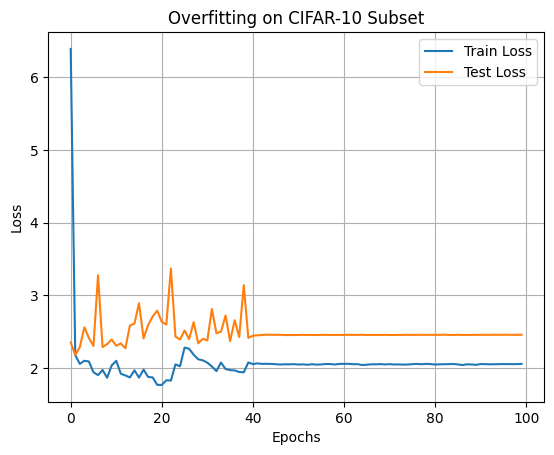

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

mean = np.array([0.5,0.5,0.5])
std = np.array([0.5,0.5,0.5])

def custom_transformation(image):
    image = np.array(image).astype(float)/255.0
    image = (image-mean)/std
    image = torch.tensor(image.transpose((2,0,1)),dtype=torch.float32)
    return image

trainset = CIFAR10(root='./data',train=True, transform=None, download=True)
testset = CIFAR10(root='./data',train=False, transform=None, download=True)

def apply_transform(dataset):
    transformed_data=[]
    for image, label in dataset:
        image_tensor = custom_transformation(image)
        transformed_data.append((image_tensor,label))
    return transformed_data

trainset = apply_transform(trainset)[:500]
testset = apply_transform(testset)[:200]

train_loader = DataLoader(dataset=trainset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=testset,batch_size=32,shuffle=False)

class OverFitNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3,512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,10)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
model = OverFitNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

train_losses = []
test_losses=[]

epochs = 100
for epoch in range(epochs):
    train_loss = 0
    model.train()
    for image, label in train_loader:
        optimizer.zero_grad()
        outputs = model(image)
        loss = criterion(outputs, label)  
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_losses.append(train_loss / len(train_loader))

    test_loss = 0.0
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}/{epochs} => Train Loss: {train_losses[-1]:.4f} | Test Loss: {test_losses[-1]:.4f}")

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Overfitting on CIFAR-10 Subset")
plt.legend()
plt.grid(True)
plt.show()